# Usage Analytics on Ford GoBike Sharing System
## by Uchenna Urom


## Introduction
> This document explores dataset from the Ford GoBike System. The data contains information about individual rides made in the greater San Francisco Bay area.

> There are 183, 412 rows showing the individual rides and 16 column variable characterising them.

> Trip data including the laitudes and longituds of the various stations, the time of trip, its duration and others were accounted for.

> The data comprises the following columns:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer)


## Preliminary Wrangling <a id=topic1></a>

> The wrangling process begins with cleaning the data for use in the exploratory analysis.

In [1]:
# import necessary packages and embed plots inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset 
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# preview the dataset 
bike_df.shape

(183412, 16)

In [4]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset comprises 183412 rows and 16 columns. The columns include integer, float and string datatypes

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest for this project are the start times, stations and type of user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will aid investigation: start times, the start and end stations, user type, gender, and birth year.

### Data Assessment and Cleaning

#### Assessment

- The datatypes for start_time and end_time columns are not correct
- Missing values in member_birth_year, member_gender, start_station_name, and end_station_name columns
- Extraneous columns in the dataset
- Columns of different observational  types in one table

In [7]:
# create a copy of the dataset before cleaning

bike_data = bike_df.copy()

### Define
Correct the datatypes for the start_time and end_time columns

In [8]:
# convert the datatypes to datetime
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [9]:
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Define 

Drop rows with missing values

In [10]:
bike_data.dropna(inplace =True)

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define
Remove columns from dataset that wouldn't be necessary for our analysis

In [12]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [13]:
# drop the unnecessary columns
ext_columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']
bike_data.drop(columns=ext_columns, inplace=True)

In [14]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender'],
      dtype='object')

### Define
Create a table for the user's info and one for the trip information

In [15]:
# create a dataframe for the user's information
user_list = ['bike_id', 'user_type', 'member_birth_year', 'member_gender']
user_df = bike_data[user_list]

# create dataframe for the bike trip info
trip_list = ['bike_id', 'duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name']
trip_df = bike_data[trip_list]

In [16]:
user_df.head()

,bike_id,user_type,member_birth_year,member_gender
0,4902,Customer,1984.0,Male
2,5905,Customer,1972.0,Male
3,6638,Subscriber,1989.0,Other
4,4898,Subscriber,1974.0,Male
5,5200,Subscriber,1959.0,Male


## Univariate Exploration


### What was the most frequent duration in bike use?

In [17]:
trip_df.duration_sec.describe() #preview the summary statistics of the duration column

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

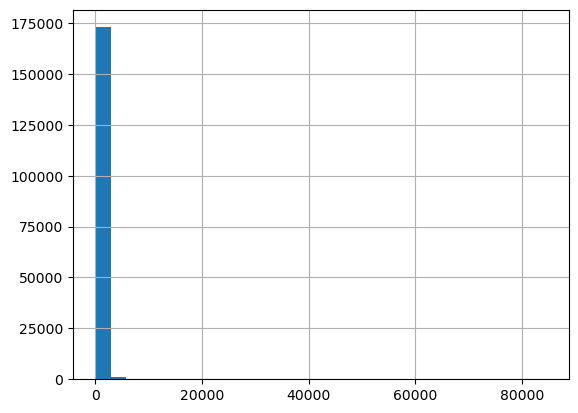

In [18]:
trip_df.duration_sec.hist(bins=30);

__Make the xscale logarithmic so the information is clearer__

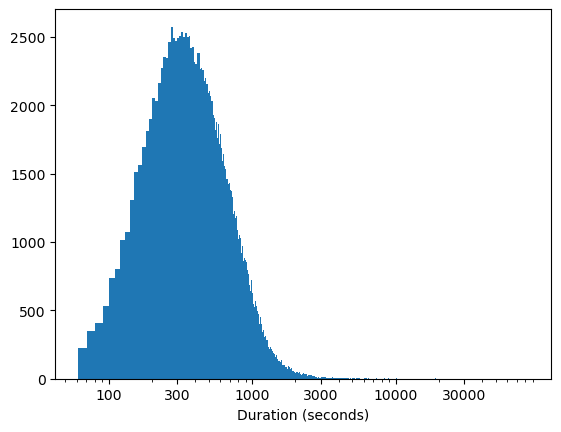

In [19]:
bins = np.arange(61, 84548+10, 10)
ticks = [100, 300, 1000, 3000, 10000, 30000]
tick_string = [str(x) for x in ticks]
plt.hist(data = trip_df, x= 'duration_sec', bins=bins)
plt.xlabel('Duration (seconds)')
plt.xscale('log');
plt.xticks(ticks, tick_string);

We can see that the duration of bike rides gives a unimodal distribution around 300 seconds and a slight skew to the right also showing that there are outliers as seen in thesummary statistics

### What user type had the most use for the bikes?

In [20]:
user_df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [21]:
#define a function for countplots 
def make_countplot(df,col):
    '''a simple function to make countplots from dataframes'''
    sns.countplot(data = df, x=col)
    return plt.show()

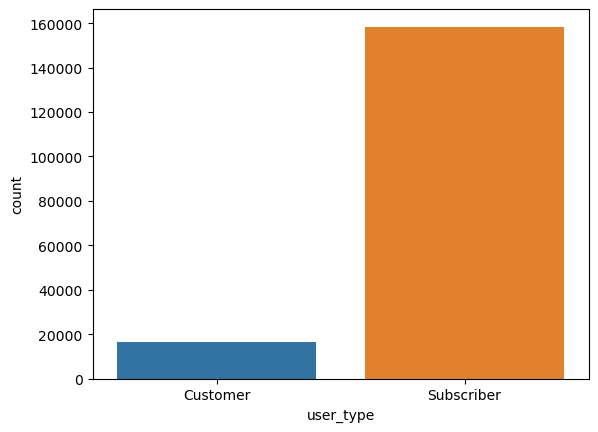

In [22]:
make_countplot(user_df, 'user_type');

The chart above shows that **subscribers** had the most use for the bikes in this system. With a count of more than trice the uses by **Customers** user class.

### Did gender influence bike use in this system?

In [23]:
user_df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [24]:
user_df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

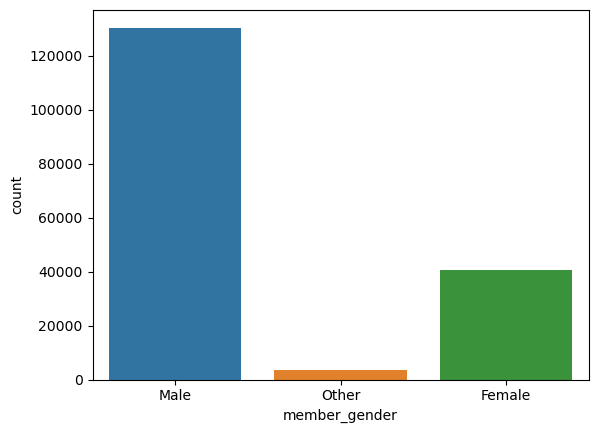

In [25]:
make_countplot(user_df, 'member_gender')

Clearly, males use the bike more than any other gender surveyed. Females come in second with just under half the number of usage by the make gender. 

### Did user age impact the customer group or was it mixed around all ages?

In [26]:
 # add the user_age series as a column in the user dataframe
user_df['age'] = trip_df.start_time.dt.year.unique()[0] -  user_df.member_birth_year 
user_df.age.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_2636\2679606535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['age'] = trip_df.start_time.dt.year.unique()[0] -  user_df.member_birth_year


0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: age, dtype: float64

In [27]:
# drop the birth_year column for tidiness
user_df.drop(columns=['member_birth_year'], inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_2636\3645069040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.drop(columns=['member_birth_year'], inplace=True)


In [28]:
user_df.head()

,bike_id,user_type,member_gender,age
0,4902,Customer,Male,35.0
2,5905,Customer,Male,47.0
3,6638,Subscriber,Other,30.0
4,4898,Subscriber,Male,45.0
5,5200,Subscriber,Male,60.0


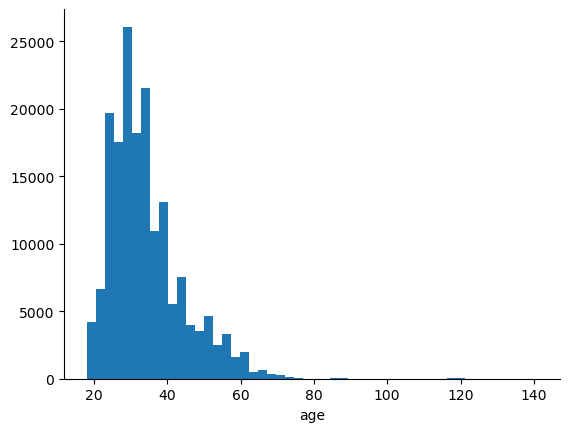

In [29]:
# create df with customers who specified their birth years
df = user_df[user_df.age.notnull()]

# visualise the age distributions 
bins = np.arange(df.age.min(), df.age.max()+2, 2)
plt.hist(data = df, x='age', bins =50)
plt.xlabel('age')
sns.despine();

The histogram shows a uniimodal distribution with a skew to the right. It shows that younger users were more popular mostly between the ages of 20 and 40.

#### What were the most popular start and end stations?

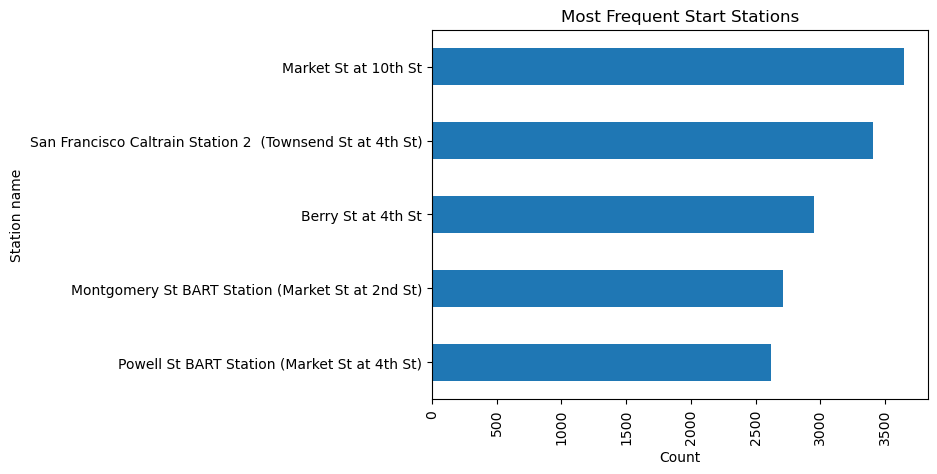

In [30]:
# obtain the most frequent start stations
start_stations = trip_df.start_station_name.value_counts(ascending=True).tail()

# make a plot depicting the information

start_stations.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Station name')
plt.title('Most Frequent Start Stations')
plt.xticks(rotation=90);

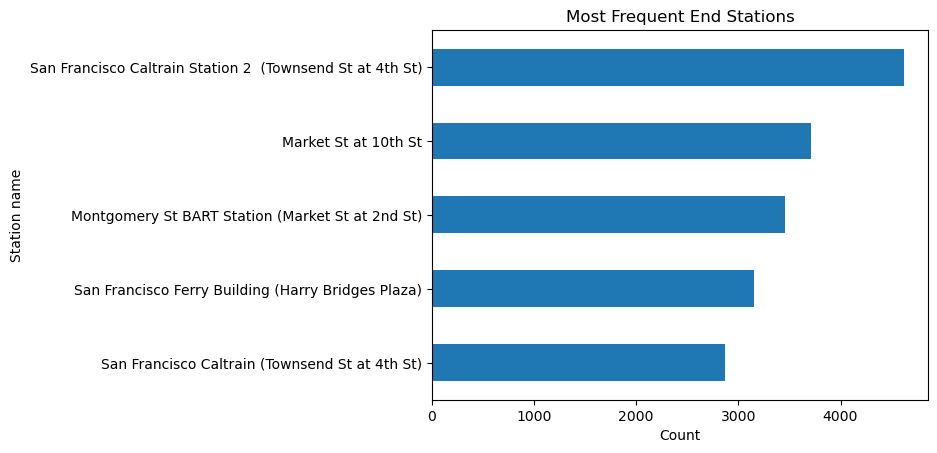

In [31]:
# obtain the most frequent end stations
end_stations = trip_df.end_station_name.value_counts(ascending=True).tail()

# make a plot depicting the information
end_stations.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Station name')
plt.title('Most Frequent End Stations');

This plot shows the most visited start and end stations. It's also interesting to see that almost all of the 5 most frequent start stations are also some of the most frequent end stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distibution plot for the duration seconds were largely spread out. I performed a log transformation on the data to capture the frequency of occurrence at both small durations and larger ones. Under the transformation, the distriution appeared to be unimodal with a peak around 300 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During investigation of both the duration and age variables, a few outliers were noted. For the age however, I derived the age column using the difference between the pre-specified users' birth year and when they used the bike (2019). Also, I made my visualisation using this age variable to better understand the age distribution instead of their birth years.

## Bivariate Exploration

> Exploring the relationship between the duration and age of the users to see if younger user ride for longer periosd than the older ones.

In [32]:
user_df.head()

,bike_id,user_type,member_gender,age
0,4902,Customer,Male,35.0
2,5905,Customer,Male,47.0
3,6638,Subscriber,Other,30.0
4,4898,Subscriber,Male,45.0
5,5200,Subscriber,Male,60.0


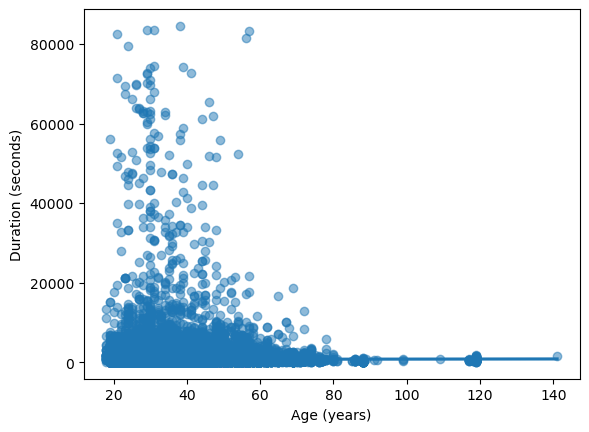

In [33]:
sns.regplot(x= user_df.age, y=trip_df.duration_sec, scatter_kws = {'alpha':0.5})
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)');

As expected, the plot above shows that the riding duration was highest for younger users. Below 40, the duration was higher than for older years. The regression wasnt linear as the duration stayed low for many ages there is a very weeak correlation between the age and duration.

#### What effect did gender have on user of the bike service?

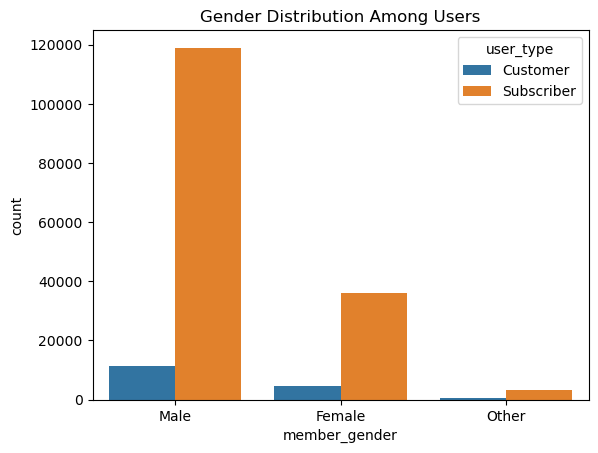

In [34]:
# make a plot to visualise number of user types for each gender
sns.countplot(data = user_df, x = 'member_gender', hue='user_type', order = user_df.member_gender.value_counts().index)
plt.title('Gender Distribution Among Users');

The chart shows that more subscribers among all the genders used the bike service the most. The proportion of Subscribers to Customer user type was clearly larger.

A comparison between the proportion of subscribed users among all the genders would reveal a better view of how subscribers compared among genders.

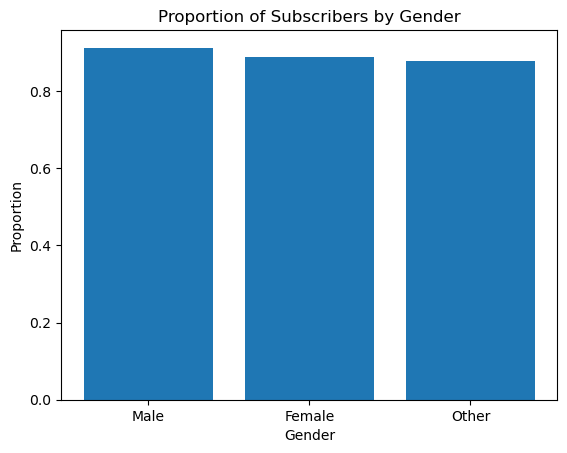

In [35]:
user_count = user_df.member_gender.value_counts()  #get the total number of users by their types

# obtain the number of Subscribers for each gender
new_df = user_df.groupby(['member_gender','user_type']).size()

# loop through the different genders and create list for proportion of subscribers for each
gender = ['Male', 'Female', 'Other']
proportion = []
for name in gender:
    proportion.append(new_df[name]['Subscriber']/user_count[name])
    
    
# make a plot to show the proportions of sucscriptions
plt.bar(x=gender, height=proportion)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Subscribers by Gender');

As noticed earlier, the number of male **Subscribers** were more than other genders by count. A view od their proportions shows that the proportion of male subscribers was fairly even among all the genders.

#### Does age affect the user type in the bikeshare program?

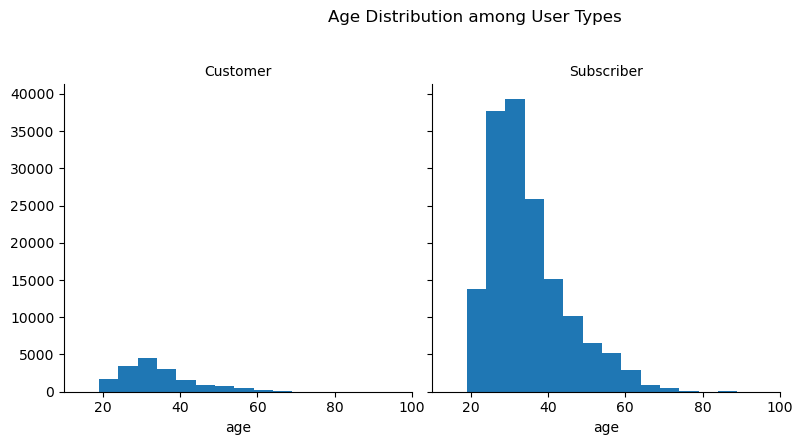

In [36]:
bin = np.arange(14, 141+5, 5)
facet_grid = sns.FacetGrid(data=user_df, col='user_type', height=4)
facet_grid.map(plt.hist, 'age', bins=bin)
facet_grid.set_titles('{col_name}')
facet_grid.set(xlim=(10, 100))
plt.suptitle('Age Distribution among User Types', x=0.6, y=1.1);

Both plots have similar depicions as the younger population in both user types were more populated. The notable skew to the left in both facets also shows the decline in number of users in older ages.

#### What user type rode for longer durations?

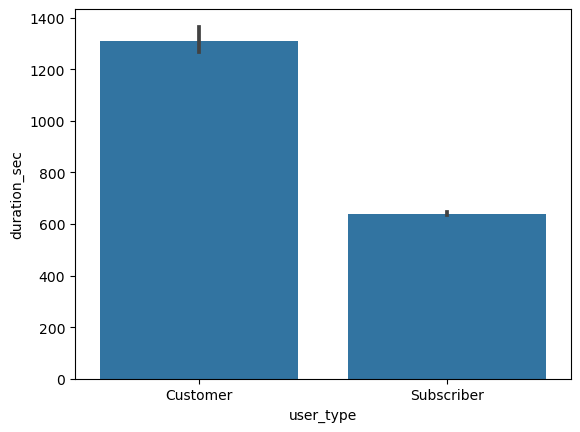

In [37]:
# use a barplot to show mean duration for each user type
colours = sns.color_palette()[0]
sns.barplot(x=user_df.user_type, y=trip_df.duration_sec, color=colours);

#### What time of day saw the most demand from both users?

C:\Users\PC\AppData\Local\Temp\ipykernel_2636\148184818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_df['start_hour'] = trip_df.start_time.dt.hour #create a column in the trip df dataframe containing the hour values from start hour


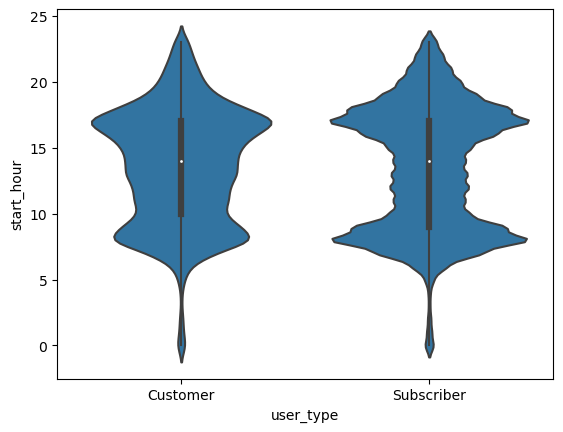

In [38]:
trip_df['start_hour'] = trip_df.start_time.dt.hour #create a column in the trip df dataframe containing the hour values from start hour

# join the user type and start hour columns into a df
new_df = pd.DataFrame(user_df['user_type']).join(pd.DataFrame(trip_df.start_hour))

# create a bivariate plot showing the relation between the start hour and usertype
sns.violinplot(data = new_df, x='user_type', y='start_hour', color=colours);

The plots show a similar use pattern among the two user types. However, the subscribers had a steeper use for the bikes during the eveing around 1700 hours and in the mornings around 8 than Customers.

#### Was usage uniform throughout the week?

In [39]:
# create columns to record the day names for each ride from start_time column
trip_df['day_name'] = trip_df.start_time.dt.day_name()

# create an order for the the day_name in categorical format
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# convert the column to categorical datatype
def make_category(df, ordd):
    '''quick function to make order for ordinal categorical variables'''
    order = pd.api.types.CategoricalDtype(ordered=True, categories=ordd)
    return df.astype(order)

trip_df.day_name = make_category(trip_df.day_name, day_order)

C:\Users\PC\AppData\Local\Temp\ipykernel_2636\2585919044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_df['day_name'] = trip_df.start_time.dt.day_name()
C:\Users\PC\AppData\Local\Temp\ipykernel_2636\2585919044.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_df.day_name = make_category(trip_df.day_name, day_order)


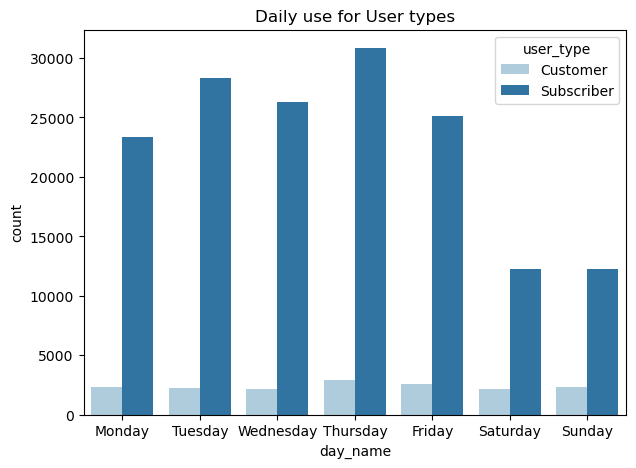

In [40]:
plt.figure(figsize=(7,5))

user_day = trip_df[['day_name']]
user_day = user_day.join(user_df.user_type)
sns.countplot(data=user_day, x='day_name', hue='user_type', palette='Paired')
plt.title('Daily use for User types');

This plot shows a larger amount of customers used bikes during the week days than on the weekends. This trend was also slightly noticeable among the Customer user types. 

Thus the day of the week clearly affected the use of the bike use.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The proportion of any gender who were subscriber usertypes were almost even across all the genders with only a little differenc. this was contrary to the first opinion that males dominated simply by having more number of users. Also as epected, older users of the bikes rode shorter durations. The usge based on he weekdays also showed that weekends had lower use compared to the weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The realation between the start time and the user type was interesting. This was because the both sw similar user engagements around the mornings and evenings. Although the Customer usertype had a little more users than Subscribers outside peak hours.

## Multivariate Exploration


#### What ages and user type use the service most on the weekdays?

Considering the relationship between the user type, their age, and the day will help determine the usage patterns among the different  ages of users.


In [41]:
user_df.head()

,bike_id,user_type,member_gender,age
0,4902,Customer,Male,35.0
2,5905,Customer,Male,47.0
3,6638,Subscriber,Other,30.0
4,4898,Subscriber,Male,45.0
5,5200,Subscriber,Male,60.0


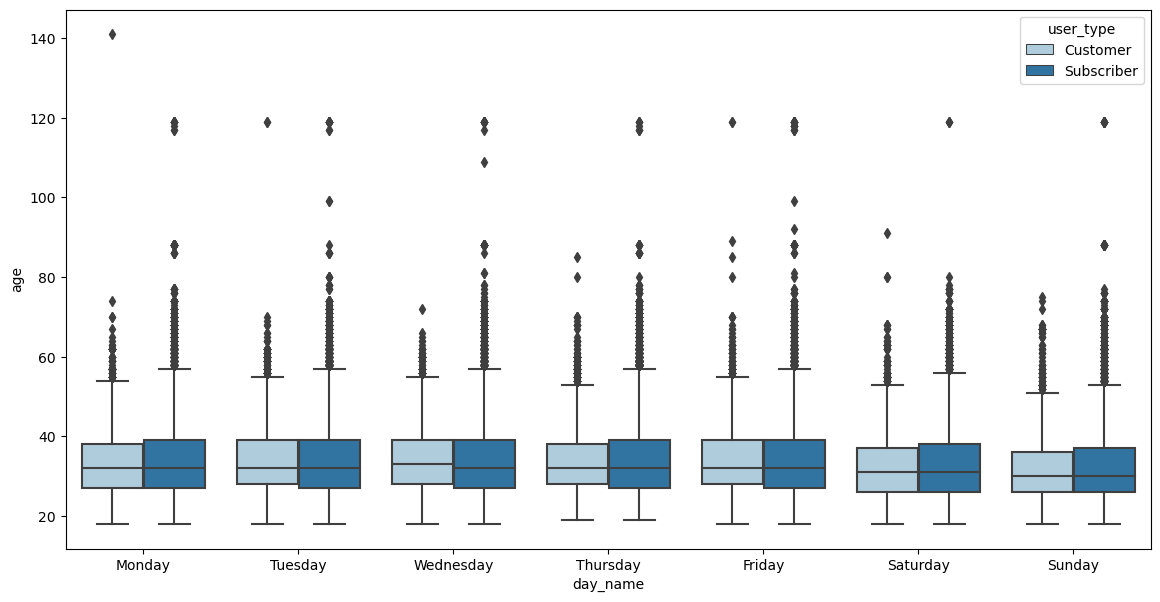

In [42]:
plt.figure(figsize=(14,7))
df = user_df[['user_type', 'age']].join(trip_df.day_name)

sns.boxplot(data = df, x='day_name', y='age', hue='user_type', palette="Paired");

The plot emphasis that the ages between 25 and 40 were the most frequent users. It also shows that the age didn't really ifluence the usage on weekends different than the weekdays. 

#### Does the day of the week influence the hour of use?

This will help detrmine if there are different demand rates at different days of the week depending on the day.

In [43]:
# create a column for the hour of each trip
trip_df['hour'] = trip_df.start_time.dt.hour

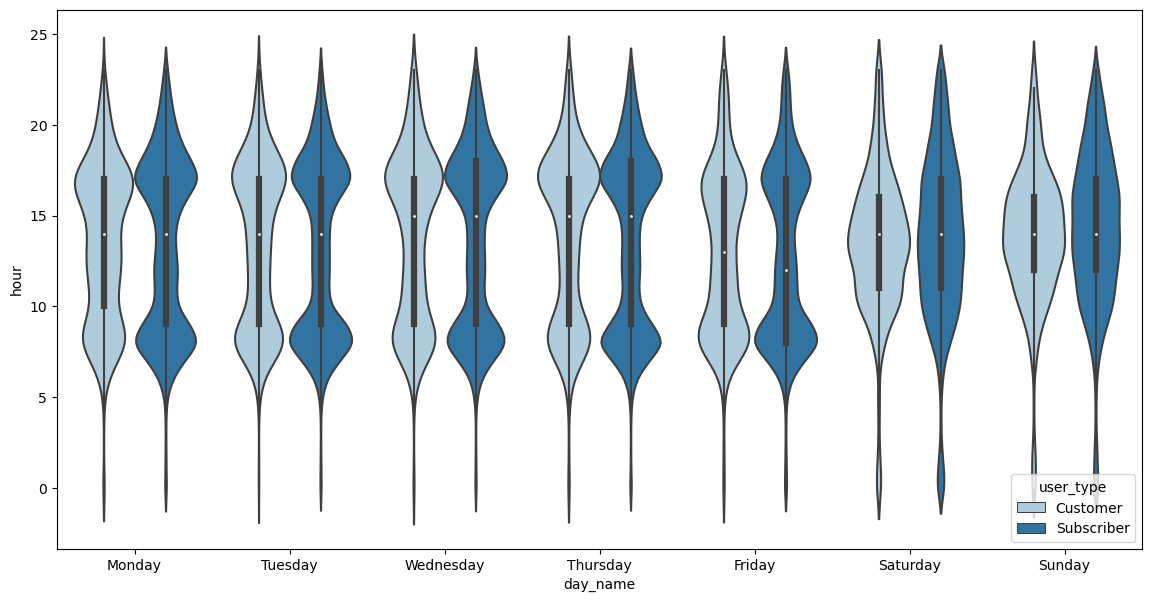

In [44]:
plt.figure(figsize=(14,7))
df2 = trip_df[['day_name', 'hour']].join(user_df.user_type)

# make a plot to visualize  relationship
sns.violinplot(data = df2, x='day_name', y='hour', hue='user_type', palette='Paired');

In the above plot, there is a clear difference between the demand pattern on the different days of the week. The weekends saw theier highest demand between 1000 and 1500 while weekdays were busier in the mornings and evenings. However, Customer usertype had more demand on the weekends than Subscribers around the same peak hours.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I expected that age may affect usage on the weekends following suspicion of weekday peak hours being due to commuters to and from work. However, age didnt really affect the user demand on the weekends. ALthough is showed that Subscribers had lesser older users than the Customers from the third quartile of thebox plot.  

### Were there any interesting or surprising interactions between features?

Yes, the peak hours on the weekends changed as compared to the normal peak periods for weekdays. It now fell between the hours of 1000 and 1500. 

## Conclusions

- The exploration revealed that the most frequent start and end stations were `Market St at 10th St` and  `San Francisco Caltrain Station 2  (Townsend St at 4th St)` respectively.

- It became clear that younger users rode longer distances that older users and age had no impact on daily use.

- A decline in the demand was also noted during the weekends compared to the usual rates during weekdays.

- Peak hours of usage during weeks days were between 0800 and 1000 in the morning and 1600 to 1700 in the evenings.

- This was different on weekends for both Customers and Subscribers during weekends. Here, peak hours were between 1000 and 1500 in the weekend.

> This conclusion was reached following the wrangling process of cleaning the data to remove unwanted data points and making it tidy. 

Univariate plots of histograms, and barplots were used also to get an overview of different features in the data. 

Further, bivariate analysis of the data especially considering the usertypes and day of the week was necessary to investigate relationship with other variables.

Finally, Multivariate analysis into the usage pattern among the different user types on different week days and time of day. This process revealed the aforementioned results.


